## Pandas计算同比环比指标的3种方法

#### 同比和环比：环比和同比用于描述统计数据的变化情况
* 环比：表示本次统计段与相连的上次统计段之间的比较。
    - 比如2010年中国第一季度GDP为G2010Q1亿元，第二季度GDP为G2010Q2亿元，则第二季度GDP环比增长（G2010Q2-G2010Q1)/G2010Q1；
* 同比：即同期相比，表示某个特定统计段今年与去年之间的比较。
    - 比如2009年中国第一季度GDP为G2009Q1亿元，则2010年第一季度的GDP同比增长为（G2010Q1-G2009Q1)/G2009Q1。

<img src="./other_files/tongbi_huanbi.jpg" style="margin-left:0px; "/>


演示步骤：
0. 读取连续3年的天气数据
1. 方法1：pandas.Series.pct_change
2. 方法2：pandas.Series.shift
3. 方法3：pandas.Series.diff

pct_change、shift、diff，都实现了跨越多行的数据计算

### 0. 读取连续3年的天气数据

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
fpath = "./datas/beijing_tianqi/beijing_tianqi_2017-2019.csv"
df = pd.read_csv(fpath, index_col="ymd", parse_dates=True)

In [3]:
df.head(3)

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2017-01-01,5℃,-3℃,霾~晴,南风,1-2级,450,严重污染,6
2017-01-02,7℃,-6℃,晴~霾,南风,1-2级,246,重度污染,5
2017-01-03,5℃,-5℃,霾,南风,1-2级,320,严重污染,6


In [4]:
# 替换掉温度的后缀℃
df["bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')

In [5]:
df.head(3)

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2017-01-01,5,-3℃,霾~晴,南风,1-2级,450,严重污染,6
2017-01-02,7,-6℃,晴~霾,南风,1-2级,246,重度污染,5
2017-01-03,5,-5℃,霾,南风,1-2级,320,严重污染,6


In [6]:
# 新的df，为每个月的平均最高温
df = df[["bWendu"]].resample("M").mean()

In [7]:
# 将索引按照日期升序排列
df.sort_index(ascending=True, inplace=True)

In [8]:
df.head()

,bWendu
ymd,
2017-01-31,3.322581
2017-02-28,7.642857
2017-03-31,14.129032
2017-04-30,23.700000
2017-05-31,29.774194


In [9]:
df.index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='ymd', freq='M')

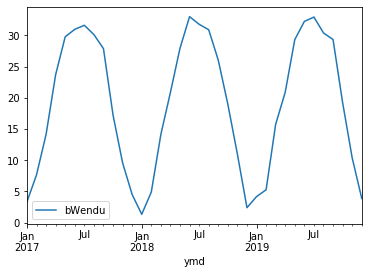

In [10]:
df.plot()

### 方法1：pandas.Series.pct_change

pct_change方法直接算好了"(新-旧)/旧"的百分比

官方文档地址：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html

In [11]:
df["bWendu_way1_huanbi"] = df["bWendu"].pct_change(periods=1)
df["bWendu_way1_tongbi"] = df["bWendu"].pct_change(periods=12)

In [12]:
df.head(15)

,bWendu,bWendu_way1_huanbi,bWendu_way1_tongbi
ymd,,,
2017-01-31,3.322581,NaN,NaN
2017-02-28,7.642857,1.300277,NaN
2017-03-31,14.129032,0.848658,NaN
2017-04-30,23.700000,0.677397,NaN
2017-05-31,29.774194,0.256295,NaN
2017-06-30,30.966667,0.040051,NaN
2017-07-31,31.612903,0.020869,NaN
2017-08-31,30.129032,-0.046939,NaN
2017-09-30,27.866667,-0.075089,NaN


### 方法2：pandas.Series.shift

shift用于移动数据，但是保持索引不变

官方文档地址：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html

In [13]:
# 见识一下shift做了什么事情
# 使用pd.concat合并Series列表变成一个大的df
pd.concat(
    [df["bWendu"], 
     df["bWendu"].shift(periods=1), 
     df["bWendu"].shift(periods=12)],
    axis=1
).head(15)

,bWendu,bWendu,bWendu
ymd,,,
2017-01-31,3.322581,NaN,NaN
2017-02-28,7.642857,3.322581,NaN
2017-03-31,14.129032,7.642857,NaN
2017-04-30,23.700000,14.129032,NaN
2017-05-31,29.774194,23.700000,NaN
2017-06-30,30.966667,29.774194,NaN
2017-07-31,31.612903,30.966667,NaN
2017-08-31,30.129032,31.612903,NaN
2017-09-30,27.866667,30.129032,NaN


In [14]:
# 环比
series_shift1 = df["bWendu"].shift(periods=1)
df["bWendu_way2_huanbi"] = (df["bWendu"]-series_shift1)/series_shift1

# 同比
series_shift2 = df["bWendu"].shift(periods=12)
df["bWendu_way2_tongbi"] = (df["bWendu"]-series_shift2)/series_shift2

In [15]:
df.head(15)

,bWendu,bWendu_way1_huanbi,bWendu_way1_tongbi,bWendu_way2_huanbi,bWendu_way2_tongbi
ymd,,,,,
2017-01-31,3.322581,NaN,NaN,NaN,NaN
2017-02-28,7.642857,1.300277,NaN,1.300277,NaN
2017-03-31,14.129032,0.848658,NaN,0.848658,NaN
2017-04-30,23.700000,0.677397,NaN,0.677397,NaN
2017-05-31,29.774194,0.256295,NaN,0.256295,NaN
2017-06-30,30.966667,0.040051,NaN,0.040051,NaN
2017-07-31,31.612903,0.020869,NaN,0.020869,NaN
2017-08-31,30.129032,-0.046939,NaN,-0.046939,NaN
2017-09-30,27.866667,-0.075089,NaN,-0.075089,NaN


### 方法3. pandas.Series.diff

pandas.Series.diff用于新值减去旧值

官方文档：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html

In [16]:
pd.concat(
    [df["bWendu"], 
     df["bWendu"].diff(periods=1), 
     df["bWendu"].diff(periods=12)],
    axis=1
).head(15)

,bWendu,bWendu,bWendu
ymd,,,
2017-01-31,3.322581,NaN,NaN
2017-02-28,7.642857,4.320276,NaN
2017-03-31,14.129032,6.486175,NaN
2017-04-30,23.700000,9.570968,NaN
2017-05-31,29.774194,6.074194,NaN
2017-06-30,30.966667,1.192473,NaN
2017-07-31,31.612903,0.646237,NaN
2017-08-31,30.129032,-1.483871,NaN
2017-09-30,27.866667,-2.262366,NaN


In [17]:
# 环比
series_diff1 = df["bWendu"].diff(periods=1)
df["bWendu_way3_huanbi"] = series_diff1/(df["bWendu"]-series_diff1)

# 同比
series_diff2 = df["bWendu"].diff(periods=12)
df["bWendu_way3_tongbi"] = series_diff2/(df["bWendu"]-series_diff2)

In [18]:
df.head(15)

,bWendu,bWendu_way1_huanbi,bWendu_way1_tongbi,bWendu_way2_huanbi,bWendu_way2_tongbi,bWendu_way3_huanbi,bWendu_way3_tongbi
ymd,,,,,,,
2017-01-31,3.322581,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,7.642857,1.300277,NaN,1.300277,NaN,1.300277,NaN
2017-03-31,14.129032,0.848658,NaN,0.848658,NaN,0.848658,NaN
2017-04-30,23.700000,0.677397,NaN,0.677397,NaN,0.677397,NaN
2017-05-31,29.774194,0.256295,NaN,0.256295,NaN,0.256295,NaN
2017-06-30,30.966667,0.040051,NaN,0.040051,NaN,0.040051,NaN
2017-07-31,31.612903,0.020869,NaN,0.020869,NaN,0.020869,NaN
2017-08-31,30.129032,-0.046939,NaN,-0.046939,NaN,-0.046939,NaN
2017-09-30,27.866667,-0.075089,NaN,-0.075089,NaN,-0.075089,NaN
